In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xTrain = pd.read_csv('X_train.csv', header = None).to_numpy()
xTest = pd.read_csv('X_test.csv', header = None).to_numpy()
yTrain = pd.read_csv('Y_train.csv', header = None).to_numpy()
yTest = pd.read_csv('Y_test.csv', header = None).to_numpy()

In [3]:
weights = {}
df = []
identity = np.identity(7)
u,s,vt = np.linalg.svd(xTrain,full_matrices = True)
xt = np.transpose(xTrain)
for num in range(7):
    weights[num] = []

for lamb in range(5001):
    df_value = 0
    weight =  np.linalg.inv(lamb*identity+xt@xTrain)@xt@yTrain
#     print(type(weight),weight.shape)
    for dimension in range(len(weight)):
        weights[dimension].append( weight.item(dimension))
        df_value+= pow(s[dimension],2) /(pow(s[dimension],2)+lamb )
        
    df.append(df_value)

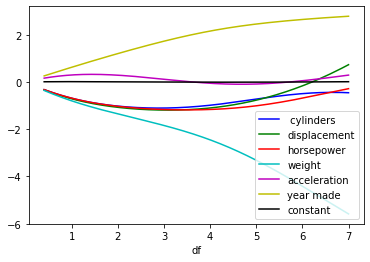

In [4]:
colors = ['b','g','r','c','m','y','k']
labels = [' cylinders', 'displacement','horsepower','weight','acceleration', 'year made','constant']
for dimension in weights:
    plt.plot(df,weights[dimension],color= colors[dimension],label=labels[dimension])
   
plt.legend()
plt.xlabel('df')
plt.show()

In [5]:
def calculateRMSE(test,train,lambRange = 51):

    for order in range(len(train)):
        rmse =[]
        xt = np.transpose(train[order])
        identity = np.identity(train[order].shape[1])
        for lamb in range(lambRange):
            weight =  np.linalg.inv(lamb*identity+xt@train[order])@xt@yTrain
            prediction = test[order]@weight

            rmse.append(np.sqrt(np.sum(pow(yTest-prediction,2))/len(yTest) ))
         
        plt.plot(list(range(lambRange)),rmse,color= colors[order],label=order+1)

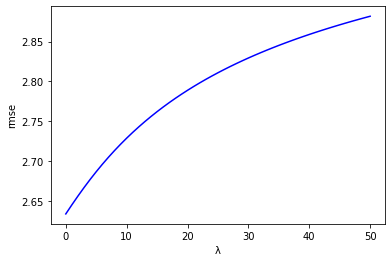

In [6]:
train = [xTrain]
test = [xTest]
calculateRMSE(test,train)
plt.ylabel('rmse')
plt.xlabel('λ')
plt.savefig("2.png")
plt.show()

In [7]:
def standardazation(Test,Train,dimension=6):
    for column in range(dimension):
        Test[:,column] = (Test[:,column] - np.mean(Train[:,column])) / np.std(Train[:,column])
        Train[:,column] = (Train[:,column] -np.mean(Train[:,column])) / np.std(Train[:,column])

In [8]:
powerTrain = pow(xTrain[:,0:6],2)
powerTest = pow(xTest[:,0:6],2)
standardazation(powerTest,powerTrain,dimension=6)
xTrain2 = np.concatenate((xTrain, powerTrain), axis = 1)
xTest2 = np.concatenate((xTest, powerTest), axis = 1)

In [9]:
cubeTrain = pow(xTrain[:,0:6],3)
cubeTest = pow(xTest[:,0:6],3)
standardazation(cubeTest,cubeTrain)
#print(powerTrain)
xTrain3 = np.concatenate((xTrain2, cubeTrain), axis = 1)
xTest3 = np.concatenate((xTest2, cubeTest), axis = 1)

In [10]:
test = [xTest,xTest2,xTest3]
train = [xTrain,xTrain2,xTrain3]

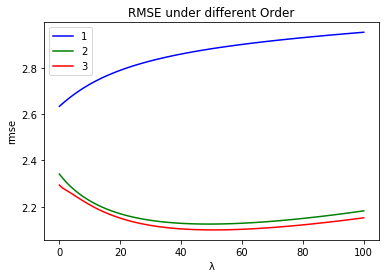

In [11]:
calculateRMSE(test,train,lambRange = 101)
plt.ylabel('rmse')
plt.xlabel('λ')
plt.title('RMSE under different Order')
plt.legend()
plt.savefig("3.png")
plt.show()